<a href="https://colab.research.google.com/github/hongqin/Python-CoLab-bootcamp/blob/master/transformer_pilot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt


Epoch: 1, Loss: 10.561737060546875
Epoch: 4, Loss: 3.10821270942688
Epoch: 7, Loss: 1.0598692893981934
Epoch: 10, Loss: 0.5560880899429321


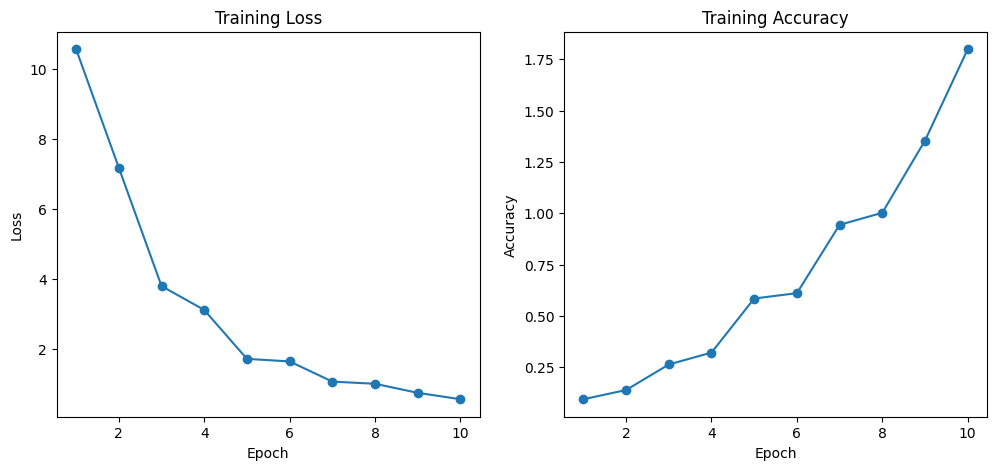

In [8]:

class TransformerBlock(nn.Module):
    def __init__(self, d_model, nhead, dim_feedforward, dropout=0.1):
        super(TransformerBlock, self).__init__()
        self.attn = nn.MultiheadAttention(d_model, nhead, dropout=dropout)
        self.feed_forward = nn.Sequential(
            nn.Linear(d_model, dim_feedforward),
            nn.ReLU(),
            nn.Linear(dim_feedforward, d_model)
        )
        self.norm1 = nn.LayerNorm(d_model)
        self.norm2 = nn.LayerNorm(d_model)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        attn_output, _ = self.attn(x, x, x)
        x = x + self.dropout(attn_output)
        x = self.norm1(x)
        ff = self.feed_forward(x)
        x = x + self.dropout(ff)
        x = self.norm2(x)
        return x

class Transformer(nn.Module):
    def __init__(self, d_model, nhead, num_layers, dim_feedforward, dropout=0.1):
        super(Transformer, self).__init__()
        self.encoder_layers = nn.ModuleList([
            TransformerBlock(d_model, nhead, dim_feedforward, dropout) for _ in range(num_layers)
        ])
        self.fc = nn.Linear(d_model, 1)

    def forward(self, x):
        for layer in self.encoder_layers:
            x = layer(x)
        x = self.fc(x)
        return x

# Define the model
d_model = 8
nhead = 2
num_layers = 2
dim_feedforward = 32
dropout = 0.1

model = Transformer(d_model, nhead, num_layers, dim_feedforward, dropout)

# Define the input and target data
# Input shape should be (seq_length, batch_size, d_model)
input_data = torch.tensor([
    [[1, 2, 3, 4, 5, 6, 7, 8], [8, 7, 6, 5, 4, 3, 2, 1]],
    [[1, 2, 3, 4, 5, 6, 7, 8], [8, 7, 6, 5, 4, 3, 2, 1]]
], dtype=torch.float32).permute(1, 0, 2)  # Shape: (2, 2, 8)
target_data = torch.tensor([[2], [3]], dtype=torch.float32)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Lists to store loss and accuracy values
loss_values = []
accuracy_values = []

# Train the model
for epoch in range(10):
    model.train()
    optimizer.zero_grad()
    output = model(input_data)
    loss = criterion(output, target_data)
    loss.backward()
    optimizer.step()

    loss_values.append(loss.item())

    # Assuming accuracy as inverse of loss for demonstration purposes
    accuracy = 1 / loss.item()
    accuracy_values.append(accuracy)

    if epoch % 3 == 0:
        print(f'Epoch: {epoch+1}, Loss: {loss.item()}')

# Plotting loss and accuracy
epochs = range(1, 11)

plt.figure(figsize=(12, 5))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(epochs, loss_values, '-o')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy_values, '-o')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.show()
